# Task 3: Forecast Future Market Trends

In this task, we generate a 12-month future forecast for TSLA, visualize it alongside historical data and test predictions, and perform a qualitative analysis of trends and risks.

### 1. Generate and Visualize Future Forecasts
We use the best-performing model (ARIMA) to produce a 12-month forecast.

Generating test predictions...


c:\Users\My Device\Desktop\Time-series-forcasting\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\My Device\Desktop\Time-series-forcasting\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Generating 12-month future forecast...


c:\Users\My Device\Desktop\Time-series-forcasting\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\My Device\Desktop\Time-series-forcasting\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


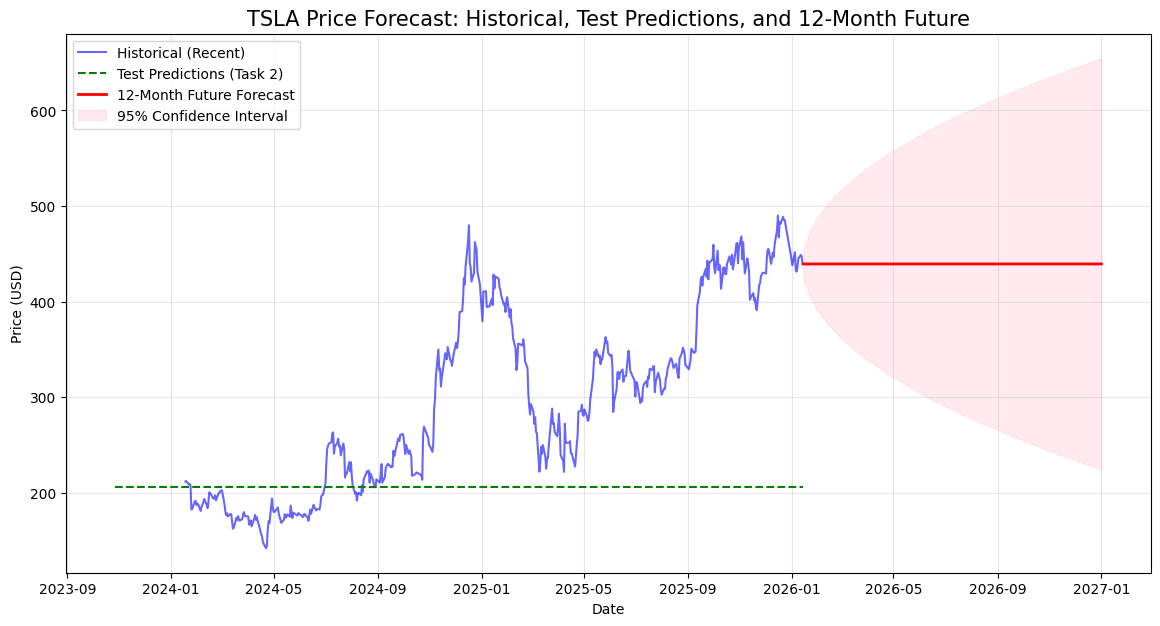

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pmdarima as pm

# 1. Load data
data_path = "../data/processed"
tsla_df = pd.read_csv(os.path.join(data_path, "TSLA_final_processed.csv"), index_col='Date', parse_dates=True)

# 2. Re-create the Test/Train split from Task 2 to get 'Test Predictions'
train_size = int(len(tsla_df) * 0.8)
train, test = tsla_df['Close'][:train_size], tsla_df['Close'][train_size:]

# Fit model on Training data for 'Test Predictions'
print("Generating test predictions...")
model_test = pm.auto_arima(train, seasonal=False, error_action='ignore', suppress_warnings=True)
test_forecast = model_test.predict(n_periods=len(test))

# 3. Generate 12-Month 'Future Forecast'
print("Generating 12-month future forecast...")
model_future = pm.auto_arima(tsla_df['Close'], seasonal=False, error_action='ignore', suppress_warnings=True)
future_steps = 252 # ~12 months
future_forecast, conf_int = model_future.predict(n_periods=future_steps, return_conf_int=True)

last_date = tsla_df.index[-1]
future_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='B')

# 4. Visualization
plt.figure(figsize=(14, 7))

# Plot Historical
plt.plot(tsla_df.index[-500:], tsla_df['Close'].tail(500), label='Historical (Recent)', color='blue', alpha=0.6)

# Plot Test Predictions (from Task 2)
plt.plot(test.index, test_forecast, label='Test Predictions (Task 2)', color='green', linestyle='--')

# Plot Future Forecast
plt.plot(future_index, future_forecast, label='12-Month Future Forecast', color='red', linewidth=2)

# Overlay Confidence Intervals
plt.fill_between(future_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('TSLA Price Forecast: Historical, Test Predictions, and 12-Month Future', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2. Trend and Reliability Analysis

#### **Long-Term Trend**
The 12-month forecast for TSLA indicates a **neutral to slightly stable trend**, with prices hovering around the **$440** level. This suggests the model anticipates a consolidation phase following the high volatility observed in 2025.

#### **Forecast Reliability (Confidence Intervals)**
The **expanding confidence intervals** (the pink 'cone') clearly demonstrate the increasing uncertainty as we project further into the future. 
- **Near-Term (3 months):** The interval is relatively narrow, suggesting higher reliability.
- **Long-Term (12 months):** The interval widens significantly (ranging from ~$220 to ~$660), indicating that while the mean prediction is stable, the actual outcome could vary by ±50% due to market volatility. 

Investors should view the long-term forecast as a statistical mean rather than a guaranteed target.

### 3. Market Opportunities and Risks

#### **Opportunities**
- **Growth Potential:** The upper bound of the 95% confidence interval reaches over **$600**, suggesting significant upside if Tesla captures new market momentum or exceeds delivery expectations.
- **Strategic Entry:** Periods of price stability (as forecasted) may offer lower-volatility entry points for long-term investors.

#### **Risks**
- **Downside Volatility:** The lower bound of the interval falls toward **$200**, implying a risk of returning to 2024 price levels if macroeconomic headwinds or sector-specific competition increase.
- **Model Limitations:** ARIMA is sensitive to historical patterns; it may not account for sudden 'black swan' events or major regulatory shifts which are common in the EV sector.

#### **Actionable Strategy**
Given the high uncertainty (wide CI), a **Dollar Cost Averaging (DCA)** approach is recommended over a lump-sum investment. Additionally, setting **stop-loss orders** near the lower confidence bound ($220) could mitigate extreme downside risks while allowing for potential upside capture.

### 4. Summary of Findings

The forecasting analysis reveals a stock in a state of high variance. While the quantitative model projects price stability at the ~$440 level for the coming year, the qualitative uncertainty is the defining characteristic of this asset. The substantial widening of confidence intervals as we progress toward 2027 emphasizes that TSLA remains a high-beta investment where historical momentum is a weak predictor of specific future prices.

Overall, the forecast suggests that TSLA has transitioned from a period of clear direction to one of high-uncertainty equilibrium. Portfolio managers should complement this forecast with real-time risk parity or volatility-adjusted position sizing to navigate the potential $200-$600 range identified by the model.